In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

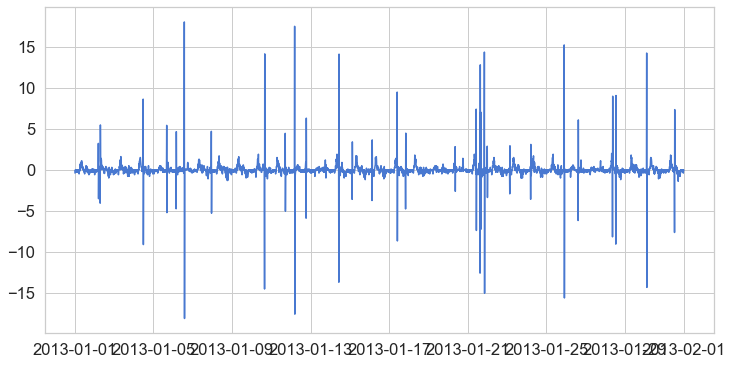

In [26]:
data_path = 'data_with_outliers_30_vales_picos_contextual.pkl'
df2 = pd.read_pickle(data_path)
#DIFF

P = np.array(df2.Potencia) 
P[0]=0
F=np.concatenate((P, P), axis=0)
G=np.reshape(F, (2, -1))
X = np.transpose(G) #aqui temos as coordenadas Potencia x Potencia
X = np.around(X, decimals=2) #1 casa depois da virgula

plt.plot(df2.Potencia.diff())

In [27]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler()
df2['Potencia_normalizada'] = None
df2['Potencia_normalizada'] = scaler.fit_transform(X)[:,0]

In [28]:
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 12, 6
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

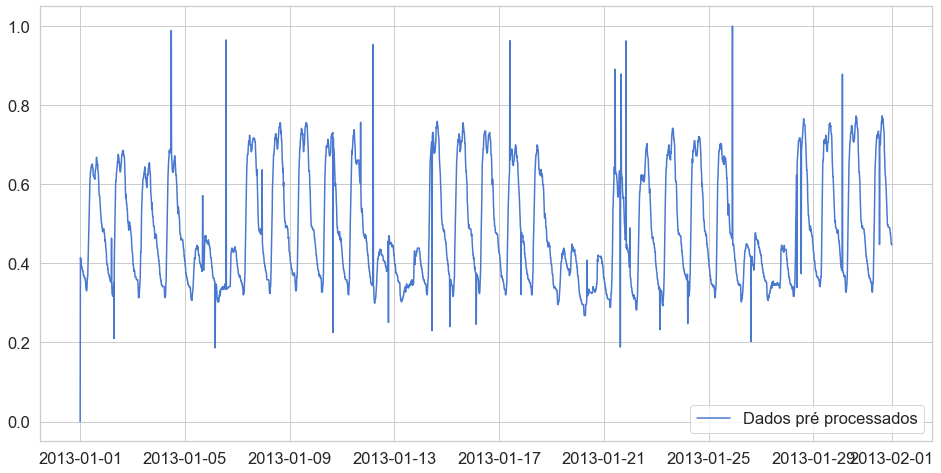

In [29]:
plt.figure(figsize=(16,8))
plt.plot (df2.index.values, df2['Potencia_normalizada'].values)
#plt.xlabel('Horas')
#plt.ylabel('Potencia')
plt.legend(['Dados pré processados','zeros','picos'])
plt.grid('on')
plt.savefig(f"pre_aee.pdf", bbox_inches = 'tight', pad_inches = 0)

In [6]:
### SEPARA TREINO E VALIDACAO

from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(df2.Potencia_normalizada, test_size=0.3,random_state=42, shuffle=False)

In [7]:
from keras.models import Model, load_model
from keras.layers import Input, Dense, Dropout, LSTM
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers, backend

input_dim = 1 #features
encoding_dim = 2
hidden_dim = 20

nb_epoch = 100
batch_size = 1
learning_rate = 0.01

input_layer = Input(shape=(input_dim, ))

encoder = Dense(encoding_dim, activation="tanh",
                activity_regularizer=regularizers.l1(10e-5))(input_layer)
#encoder = Dense(hidden_dim, activation="relu")(encoder)
#decoder = Dense(hidden_dim, activation='relu')(encoder)
#decoder = Dense(encoding_dim, activation='relu')(encoder)
decoder = Dense(input_dim, activation='tanh')(encoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)


Using TensorFlow backend.
C:\Users\Ricardo Guerra\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Ricardo Guerra\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Ricardo Guerra\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Ricardo Guerra\anaconda3\lib\site-packages\t

C:\Users\Ricardo Guerra\anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Ricardo Guerra\anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Ricardo Guerra\anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Ricardo Guerra\anaconda3\lib\site-packages\tensor

In [8]:
autoencoder.compile(optimizer='adam', 
                    loss='mean_squared_error', 
                    metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath="model_seqs2.h5",
                               verbose=0,
                               save_best_only=True)

tensorboard = TensorBoard(log_dir='./logs',
                          histogram_freq=0,
                          write_graph=True,
                          write_images=True)

history = autoencoder.fit(X_train, X_train,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_test, X_test),
                    verbose=1,
                    callbacks=[TensorBoard(log_dir='/tmp/autoencoder')]).history




Train on 2083 samples, validate on 893 samples


Epoch 1/100
2083/2083 [==============================] - 2s 1ms/step - loss: 0.0029 - acc: 4.8008e-04 - val_loss: 6.3235e-04 - val_acc: 0.0011
Epoch 2/100
2083/2083 [==============================] - 2s 1ms/step - loss: 3.9376e-04 - acc: 4.8008e-04 - val_loss: 4.2362e-04 - val_acc: 0.0011
Epoch 3/100
2083/2083 [==============================] - 2s 994us/step - loss: 3.7438e-04 - acc: 4.8008e-04 - val_loss: 4.1953e-04 - val_acc: 0.0011
Epoch 4/100
2083/2083 [==============================] - 2s 1ms/step - loss: 3.6116e-04 - acc: 4.8008e-04 - val_loss: 3.7956e-04 - val_acc: 0.0011
Epoch 5/100
2083/2083 [==============================] - 3s 1ms/step - loss: 3.4304e-04 - acc: 4.8008e-04 - val_loss: 4.2081e-04 - val_acc: 0.0011
Epoch 6/100
2083/2083 [==============================] - 2s 1ms/step - loss: 3.3637e-04 - acc: 4.8008e-04 - val_loss: 3.5237e-04 - val_acc: 0.0011
Epoch 7/100
2083/2083 [==============================] - 2s 1ms/step

2083/2083 [==============================] - 2s 1ms/step - loss: 2.0671e-04 - acc: 4.8008e-04 - val_loss: 2.1248e-04 - val_acc: 0.0011
Epoch 50/100
2083/2083 [==============================] - 2s 1ms/step - loss: 2.0754e-04 - acc: 4.8008e-04 - val_loss: 2.1815e-04 - val_acc: 0.0011
Epoch 51/100
2083/2083 [==============================] - 2s 1ms/step - loss: 2.0236e-04 - acc: 4.8008e-04 - val_loss: 2.1356e-04 - val_acc: 0.0011
Epoch 52/100
2083/2083 [==============================] - 2s 1ms/step - loss: 2.0221e-04 - acc: 4.8008e-04 - val_loss: 2.0854e-04 - val_acc: 0.0011
Epoch 53/100
2083/2083 [==============================] - 3s 1ms/step - loss: 2.0020e-04 - acc: 4.8008e-04 - val_loss: 2.9318e-04 - val_acc: 0.0011
Epoch 54/100
2083/2083 [==============================] - 3s 2ms/step - loss: 1.9853e-04 - acc: 4.8008e-04 - val_loss: 1.9952e-04 - val_acc: 0.0011
Epoch 55/100
2083/2083 [==============================] - 2s 1ms/step - loss: 1.9597e-04 - acc: 4.8008e-04 - val_loss: 2.0691

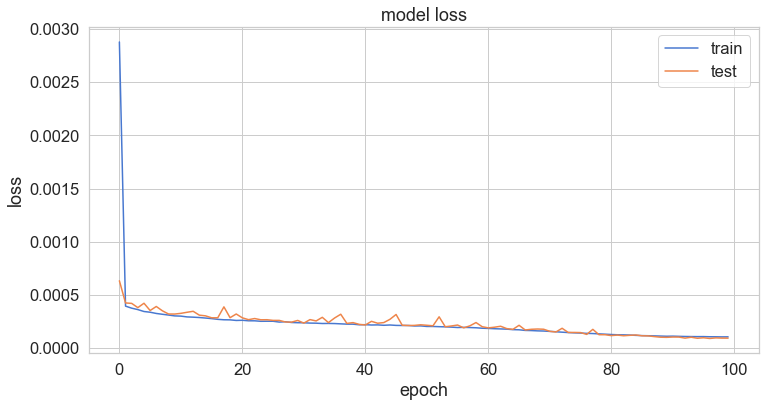

In [9]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');
plt.savefig("ex_erro_autoencoder_dispersado.pdf", bbox_inches = 'tight', pad_inches = 0)

In [56]:

data_path='E:\Dropbox\PIBIC Ricado 2019\TCC Ricardo 2020-1\codigo\dados janeiro 2013\data_with_outliers_30_vales.pkl'
df2 = pd.read_pickle(data_path)

df2 = df2.tail(896)


P = np.array(df2.Potencia.diff()) 
P[0]=0
F=np.concatenate((P, P), axis=0)
G=np.reshape(F, (2, -1))
X = np.transpose(G) #aqui temos as coordenadas Potencia x Potencia
X = np.around(X, decimals=2) #1 casa depois da virgula



#scale it
scaled_data = scaler.fit_transform(X)[:,0]


In [57]:
#predict it
predicted = autoencoder.predict(scaled_data)
#get the error term
mse = np.mean(np.power(scaled_data - predicted, 2), axis=1)
#now add them to our data frame
df2['MSE'] = mse

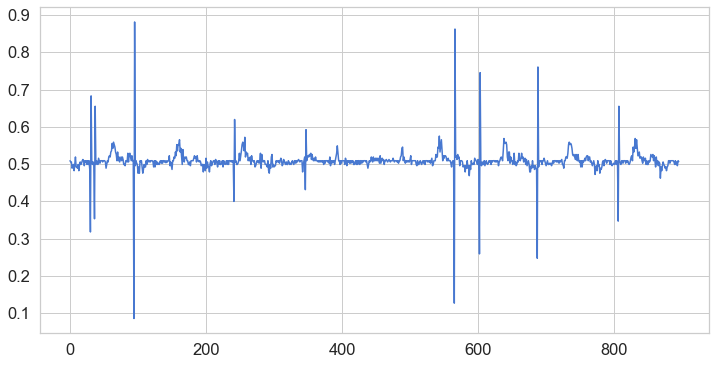

In [58]:
plt.plot(predicted)

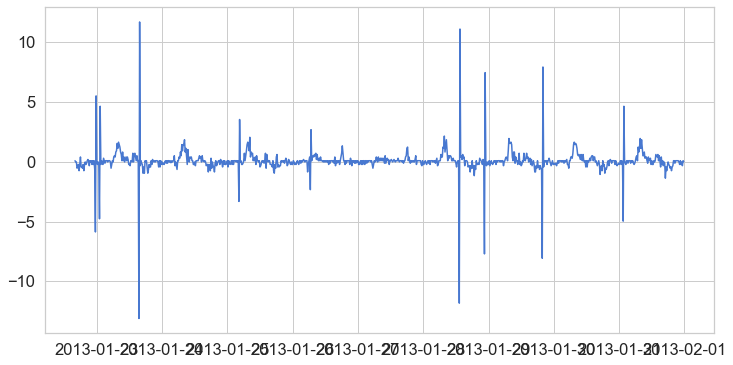

In [59]:
#### DESESCALA 
P=np.concatenate(predicted)
F=np.concatenate((P, P), axis=0)
G=np.reshape(F, (2, -1))
X = np.transpose(G)

df2['Potencia_desnormalizada'] = scaler.inverse_transform(X)[:,0] 
plt.plot(df2['Potencia_desnormalizada'])
df2['Potencia_final'] = df2['Potencia_desnormalizada']


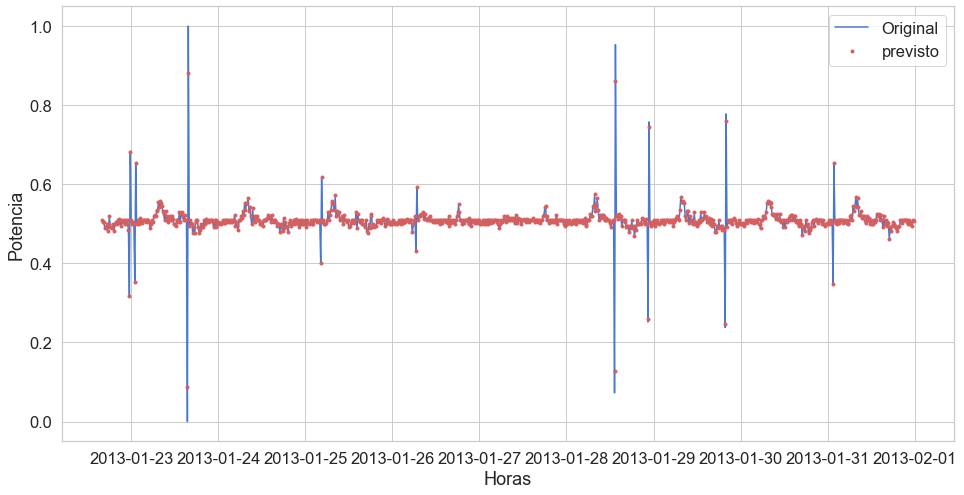

In [60]:
plt.figure(figsize=(16,8))
plt.plot (df2.index.values, scaled_data, df2.index.values, predicted, 'r.')
plt.xlabel('Horas')
plt.ylabel('Potencia')
plt.legend(['Original','previsto','picos'])
plt.grid('on')

In [61]:
#mse_threshold = np.quantile(df2['MSE'], 0.999)
from scipy import stats
mse_threshold = stats.trim_mean(df2.MSE,0.1)*3
#mse_threshold = 0.007
print(f'MSE 0.9999 threshhold:{mse_threshold}')

MSE 0.9999 threshhold:0.005318250708538377


In [62]:
df2['MSE_Outlier'] = 0
df2.loc[(df2['MSE'] > mse_threshold, 'MSE_Outlier')] = 1

In [63]:
print(f"Num of MSE outlier:{df2['MSE_Outlier'].sum()}")

Num of MSE outlier:22


In [64]:
### AQUI EU DIGO QUE O INDICE APOS O OUTLIER, NAO É OUTLIER, PARA CORRIGIR
### O PROBLEMA DO DIFF QUE JOGA O OUTLIER E O PROXIMO PONTO DELE COMO OUTLIER.
df2.MSE_Outlier.iloc[0] = 0
for x in range(0,len(df2)):
    if df2.MSE_Outlier.iloc[x] == 1:
        df2.MSE_Outlier.iloc[x+1] = 0

outliers = df2[df2.MSE_Outlier==1]

C:\Users\Ricardo Guerra\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


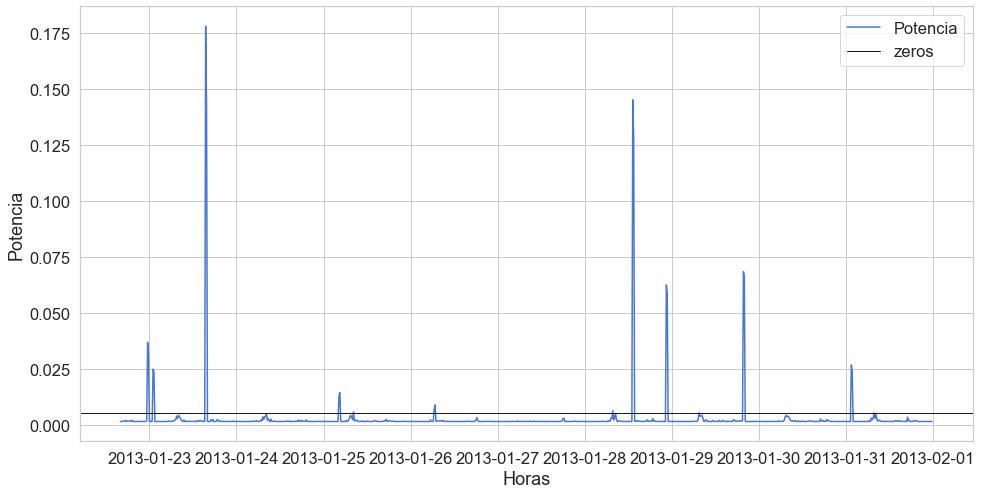

In [65]:
plt.figure(figsize=(16,8))
plt.plot (df2.index.values, df2.MSE)
plt.axhline(y=mse_threshold,linewidth=1, color='k')
plt.xlabel('Horas')
plt.ylabel('Potencia')
plt.legend(['Potencia','zeros','picos'])
plt.grid('on')
plt.savefig('ex_autoencoder2_limiar.pdf', bbox_inches = 'tight', pad_inches = 0)

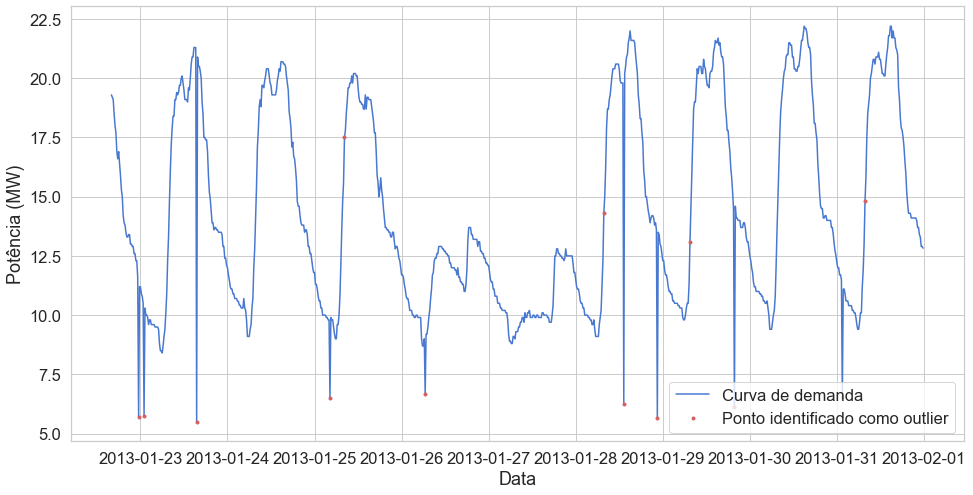

In [66]:
plt.figure(figsize=(16,8))
plt.plot (df2.index.values, df2.Potencia,outliers.index.values, outliers.Potencia,'r.')
plt.legend(['Curva de demanda','Ponto identificado como outlier'])
plt.xlabel('Data')
plt.ylabel('Potência (MW)')
#plt.legend(loc='upper left')
plt.grid('on')
plt.savefig('ex_autoencoder_disperso_outliers.pdf', bbox_inches = 'tight', pad_inches = 0)

C:\Users\Ricardo Guerra\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


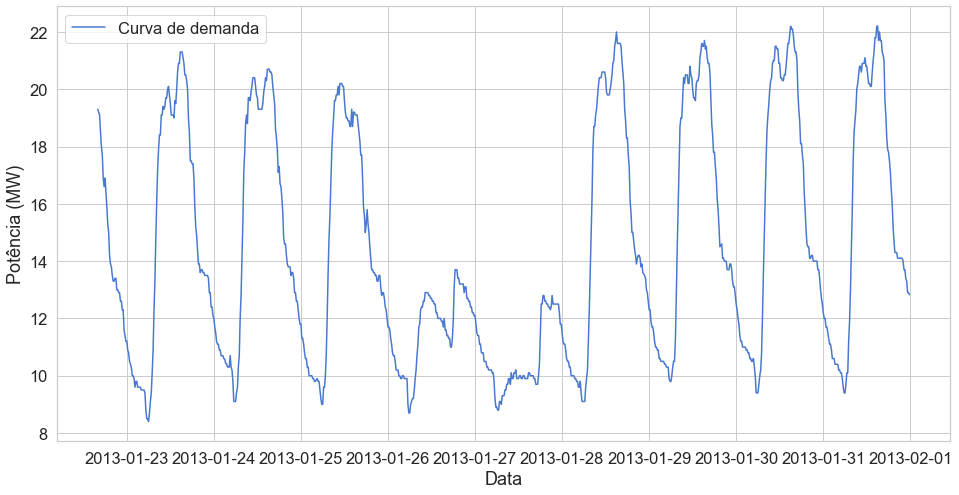

In [67]:
#Colocando todos os outliers para zeros

df2['Potencia_corrigida'] = df2.Potencia
df2.Potencia_corrigida[df2['MSE_Outlier']==1] = np.nan

#aplicar a interpolação
df2.Potencia_corrigida=df2.Potencia_corrigida.astype(float).interpolate(method='linear', limit_direction='forward', axis=0)
plt.figure(figsize=(16,8))
plt.plot (df2.index.values, df2.Potencia_corrigida)
plt.legend(['Curva de demanda'])
plt.xlabel('Data')
plt.ylabel('Potência (MW)')
plt.grid('on')
plt.savefig(f'corrigido_aut_disp.pdf', bbox_inches = 'tight', pad_inches = 0)

C:\Users\Ricardo Guerra\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


MCC = 0.8301720745737798


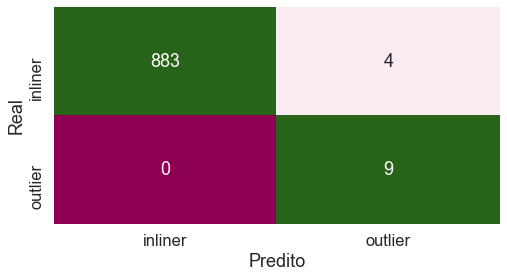

In [68]:
import seaborn as sb
df2['label_aut'] = 0
df2['label_aut'][df2.is_outlier=='outlier'] = 1

##MATRIZ DE CONFUSAO
#confusion_matrix = pd.crosstab(df2['label_aut'],df2['MSE_Outlier'], rownames=['Real'], colnames=['Previsto'],  margins=True)
#print(classification_report(df2['label_aut'], df2['MSE_Outlier']))
#display(confusion_matrix)


from sklearn.metrics import confusion_matrix, matthews_corrcoef
print(f'MCC = {matthews_corrcoef(df2.label_aut.values,df2.MSE_Outlier.values)}')
array = confusion_matrix(df2['label_aut'],df2['MSE_Outlier'])
qtd_outlier = len(df2[df2.is_outlier=='outlier'])
df_cm = pd.DataFrame(array, index = [i for i in ["inliner","outlier"]],
              columns = [i for i in ["inliner","outlier"]])
plt.figure(figsize = (8,4))
ax = sb.heatmap(df_cm, annot=True,cmap="PiYG",fmt='d', cbar=False, vmax=qtd_outlier)
ax.set(xlabel='Predito', ylabel='Real')
plt.savefig(f"cm_aut_disp.pdf", bbox_inches = 'tight', pad_inches = 0)
plt.show()

In [69]:
data_path = 'E:\\Dropbox\\PIBIC Ricado 2019\\TCC Ricardo 2020-1\\codigo\\dados janeiro 2013\\data_without_outliers.pkl'
### CALC ERRO
dfsemoutliers = pd.read_pickle(data_path)
#dfsemoutliers.set_index('Data', inplace=True)
dfsemoutliers = dfsemoutliers.tail(len(df2))

df2.Potencia_corrigida.fillna(method='bfill', inplace=True)
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(f'MAE: {mean_absolute_error(dfsemoutliers.Potencia.values, df2.Potencia_corrigida.values)}')
print(f'MSE: {mean_squared_error(dfsemoutliers.Potencia.values, df2.Potencia_corrigida.values)}')

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print(f'MAPE: {round(mean_absolute_percentage_error(dfsemoutliers.Potencia.values, df2.Potencia_corrigida.values),2)}%')

MAE: 0.0034598245152405787
MSE: 0.0015848226632418807
MAPE: 0.02%
